In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Vijayapura.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,WS50M,RH2M,PS
0,2011,4,1,5,20.90,0.0,5.90,30.75,94.94
1,2011,4,1,6,22.62,0.0,5.02,27.50,95.02
2,2011,4,1,7,26.16,0.0,3.93,21.56,95.10
3,2011,4,1,8,31.79,0.0,4.71,13.25,95.15
4,2011,4,1,9,34.59,0.0,3.80,11.31,95.16
...,...,...,...,...,...,...,...,...,...
87667,2021,4,1,0,23.82,0.0,9.64,33.88,94.51
87668,2021,4,1,1,23.00,0.0,9.37,43.06,94.49
87669,2021,4,1,2,22.39,0.0,8.84,50.88,94.46
87670,2021,4,1,3,21.86,0.0,8.09,56.62,94.47


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
PRECTOTCORR    0.0
WS50M          0.0
RH2M           0.0
PS             0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'WS50M', 'RH2M', 'PS']


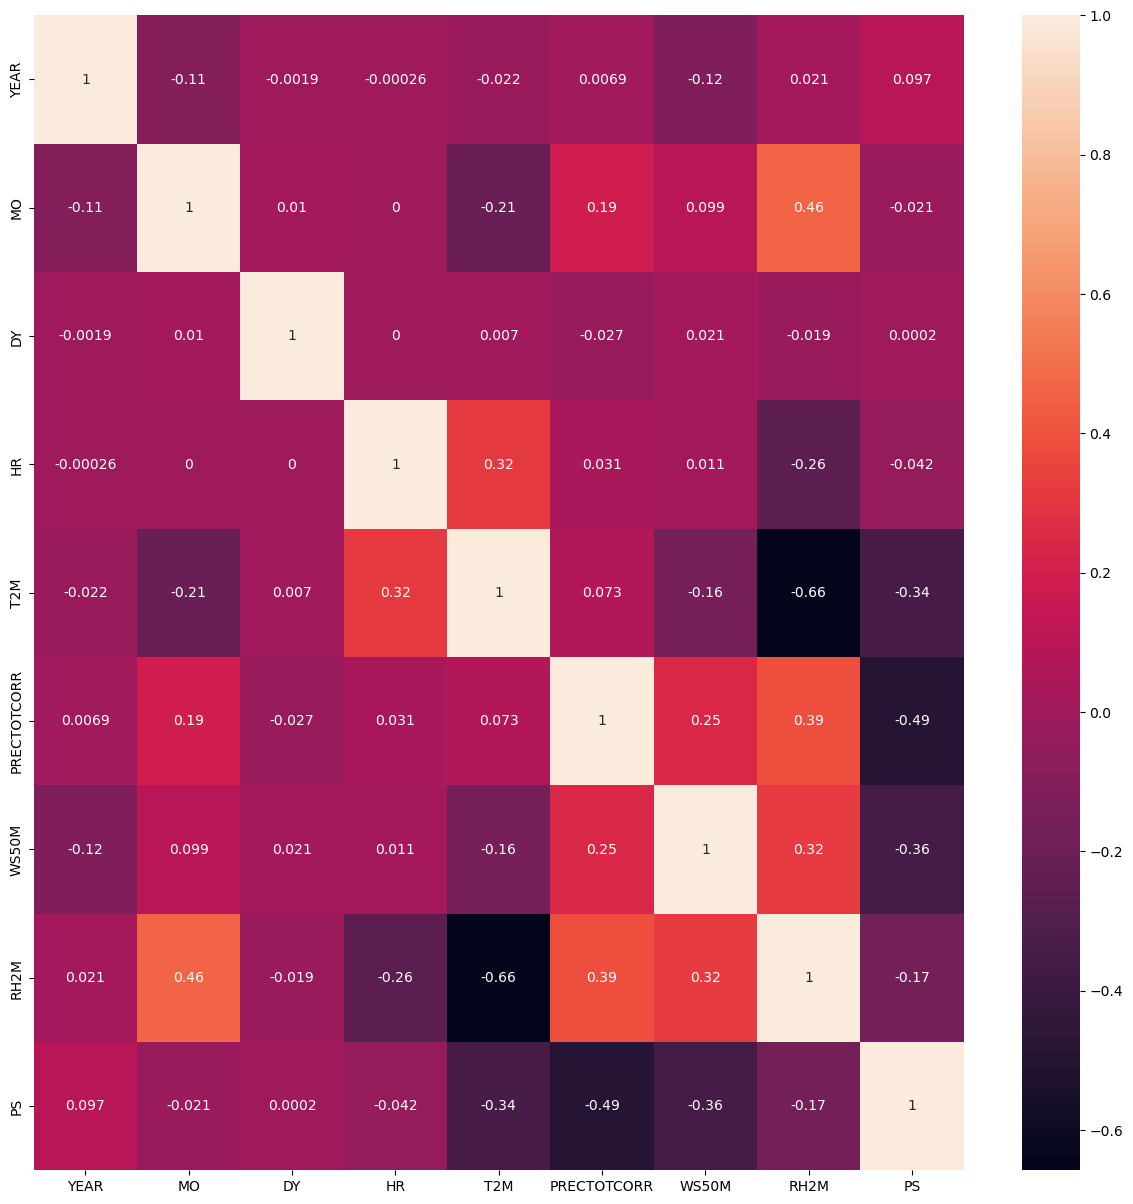

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

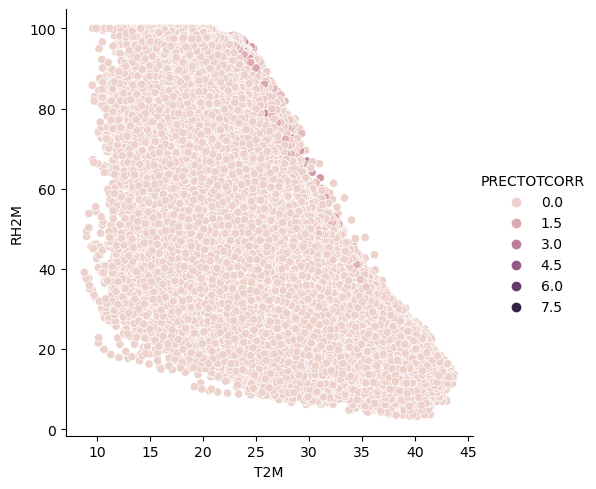

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


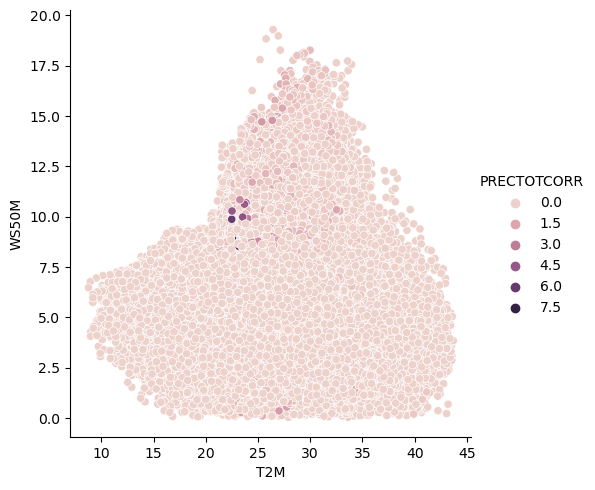

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


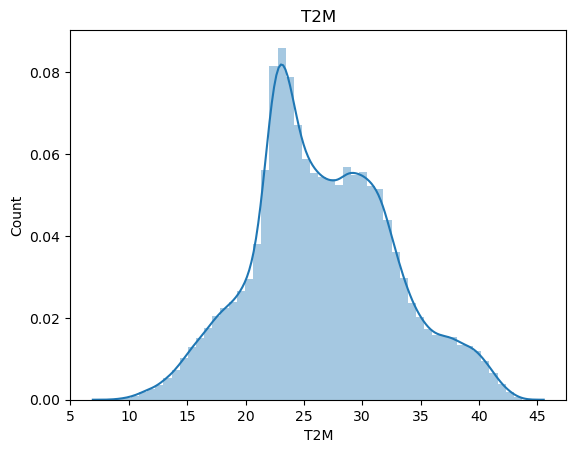

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


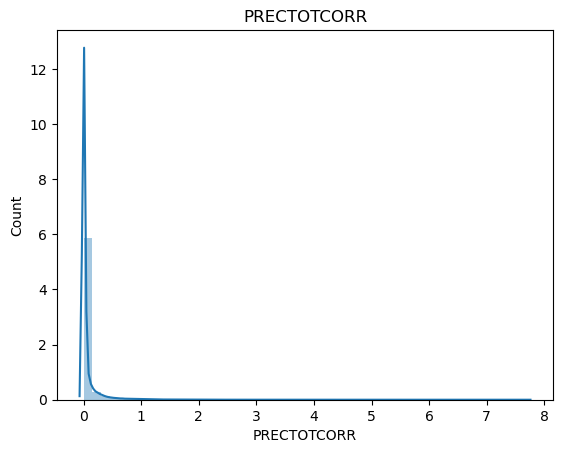

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


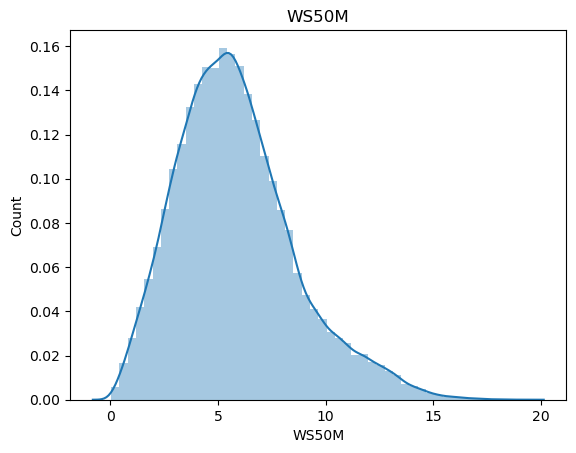

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


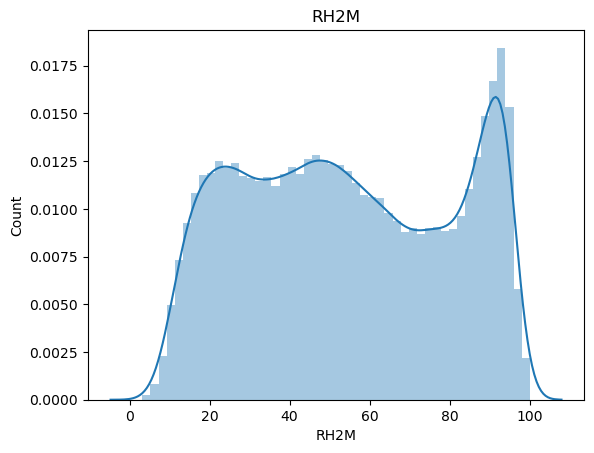

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


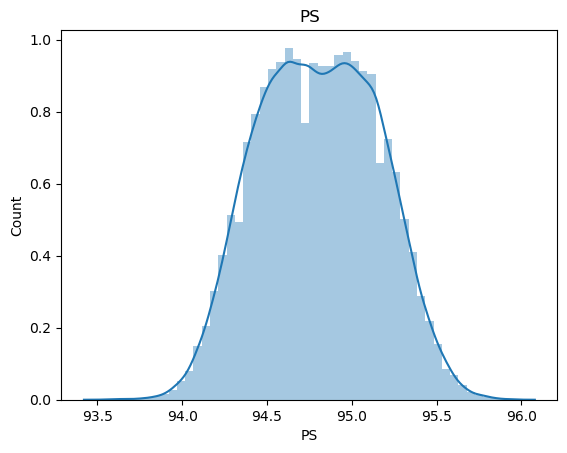

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

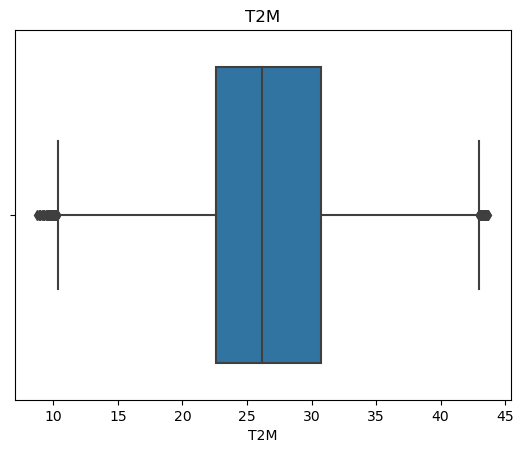

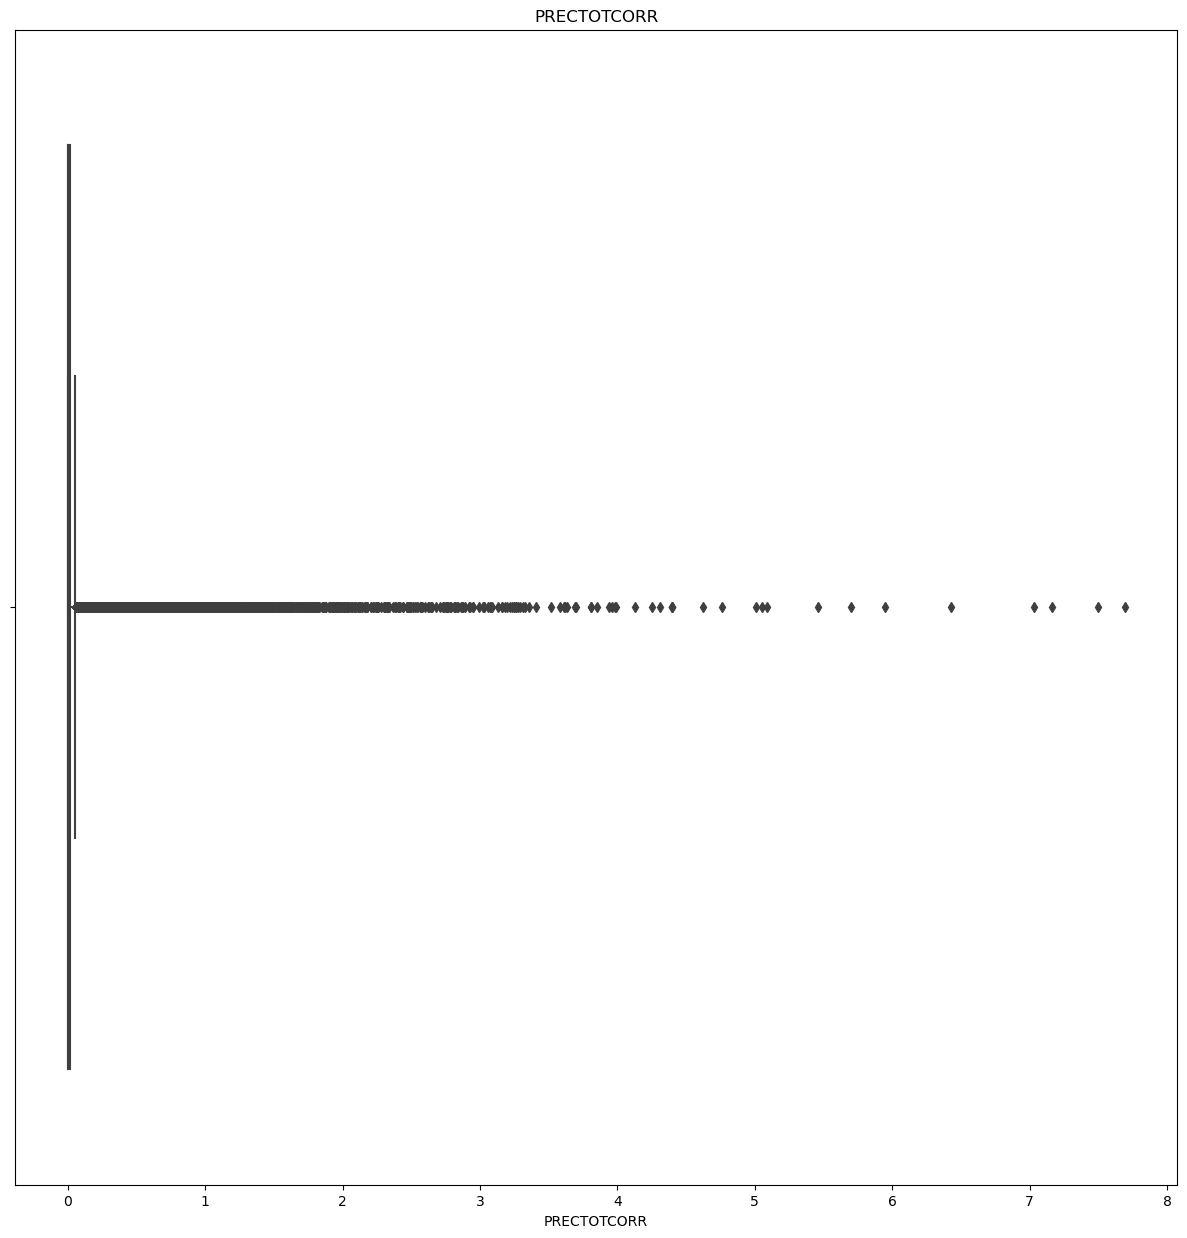

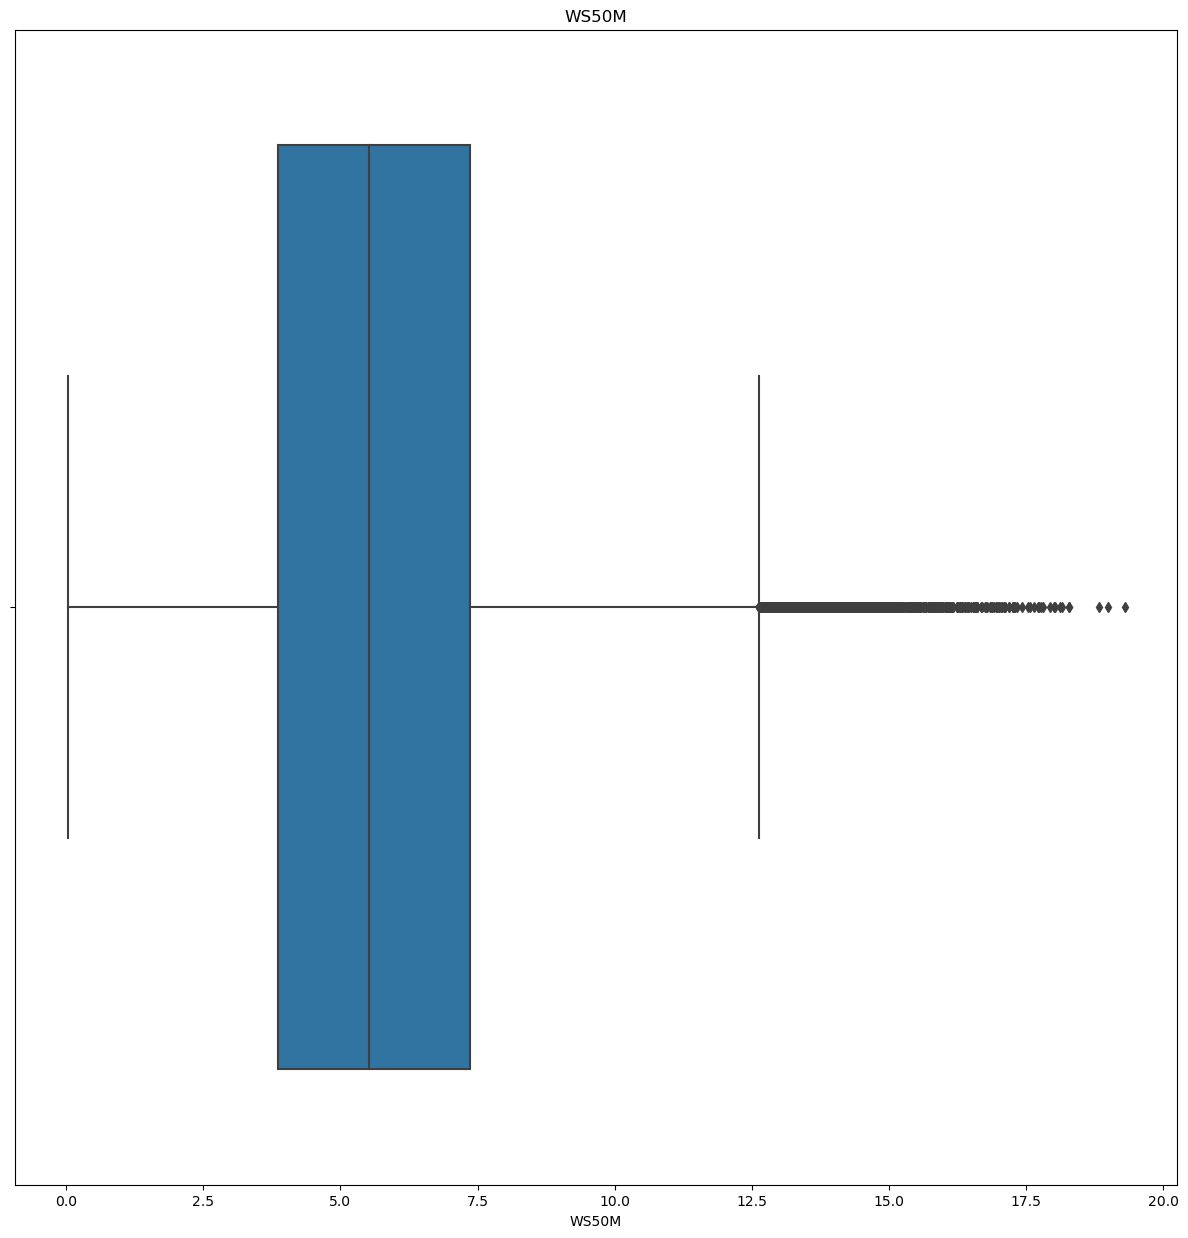

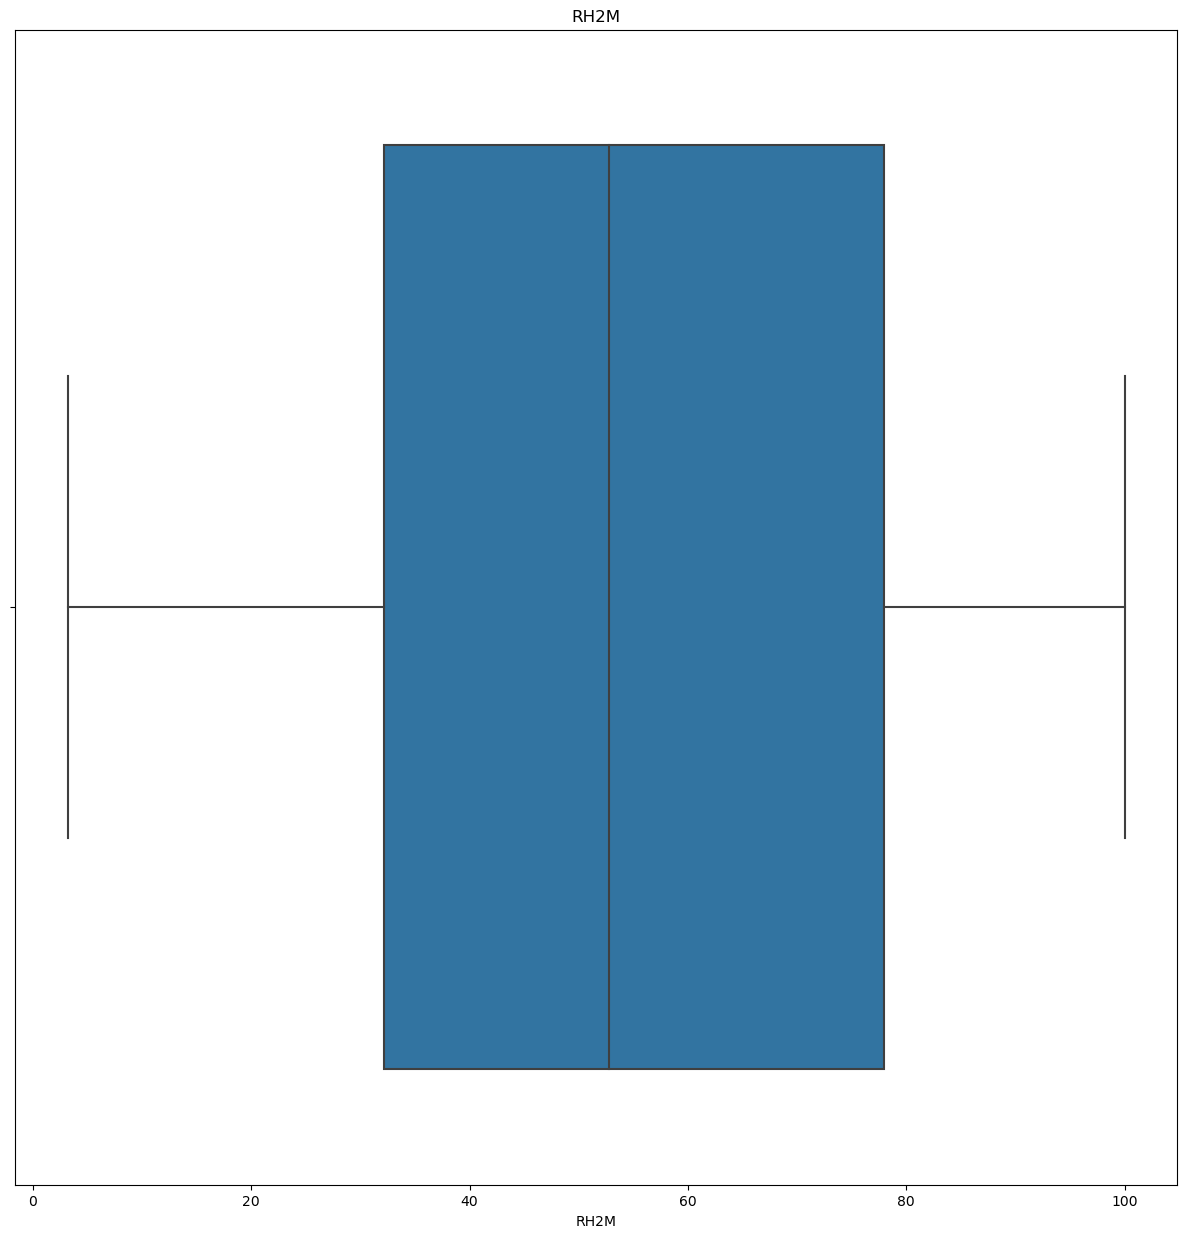

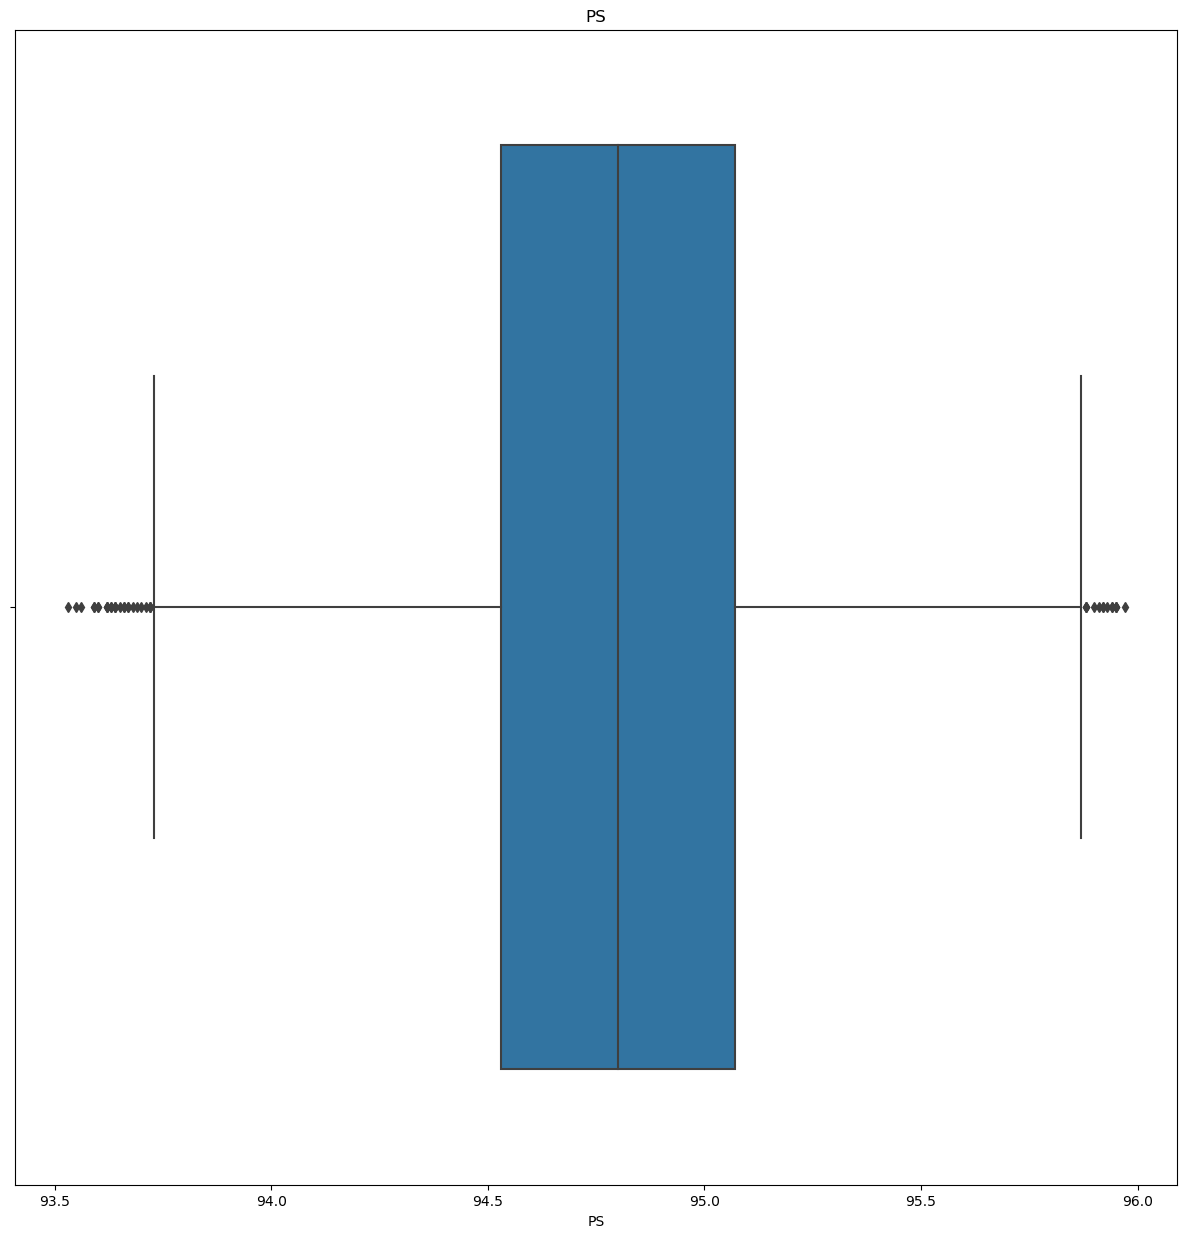

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[20.9  22.62 26.16 ...  9.97  9.57  9.89]
<class 'numpy.ndarray'>
[0.   0.04 0.08 0.1  0.15 0.21 0.24 0.27 0.3  0.28 0.09 0.03 0.05 0.02
 0.07 0.01 0.06 0.14 0.18 0.11 0.13 0.22 0.47 0.75 0.99 0.7  0.36 0.17
 0.25 0.12 0.16 0.71 0.77 0.86 0.78 0.51 0.33 0.23 0.54 0.45 0.38 0.26
 0.35 0.42 0.32 0.48 0.53 0.5  0.39 0.2  0.19 0.43 0.57 0.58 0.63 0.66
 0.44 0.56 0.41 0.29 0.31 0.37 0.62 1.05 1.33 1.34 1.   0.34 0.4  0.74
 1.06 0.93 1.41 1.67 0.46 1.07 1.46 1.5  1.54 1.21 1.09 0.69 0.59 2.04
 3.99 4.13 4.4  3.2  0.91 0.95 1.12 1.03 1.02 1.11 1.17 0.94 0.89 2.08
 2.26 2.07 1.37 0.98 0.55 0.6  0.49 0.84 0.52 0.87 1.28 1.3  0.96 0.76
 2.03 1.86 1.01 0.61 1.74 1.48 1.16 0.8  1.15 1.27 0.81 0.68 0.72 1.04
 0.79 0.85 0.97 0.64 1.59 1.42 1.08 1.45 1.44 1.55 1.58 1.36 1.14 1.32
 1.78 2.33 3.16 3.61 2.37 1.97 2.   0.83 2.01 0.65 0.92 0.67 0.73 2.57
 2.65 2.25 1.31 0.82 1.2  1.13 1.22 1.1  1.47 1.64 1.63 0.9  1.29 1.79
 3.31 3.36 2.84 2.48 1.61 1.25 1.8  1.92 2.54 3.06 2.81 2.92 1.83 1.77
 2.18 2.09 

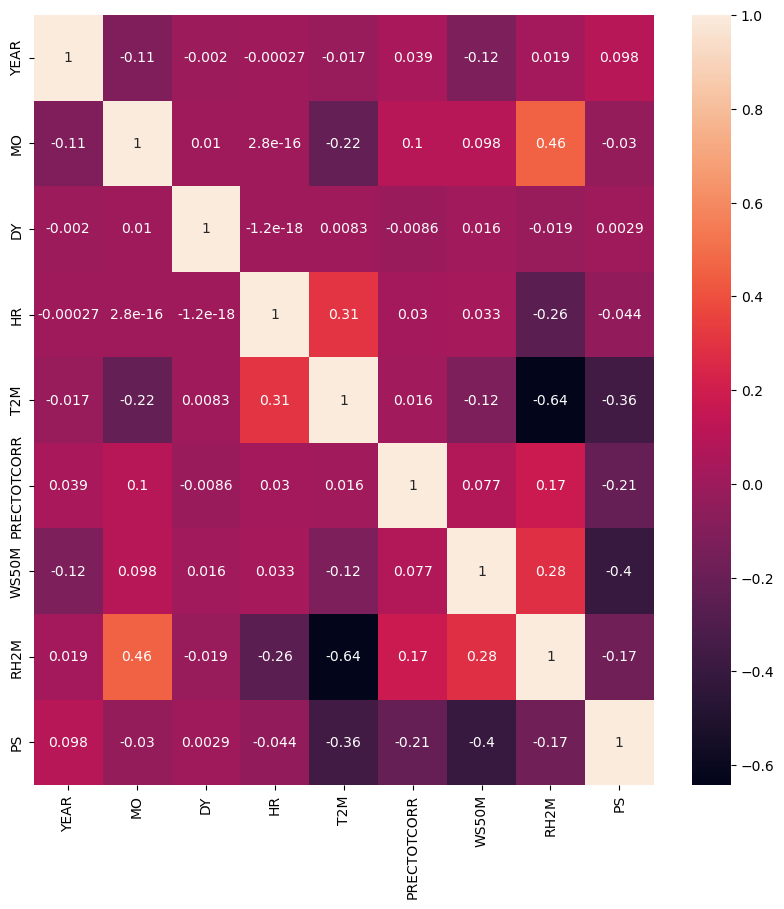

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


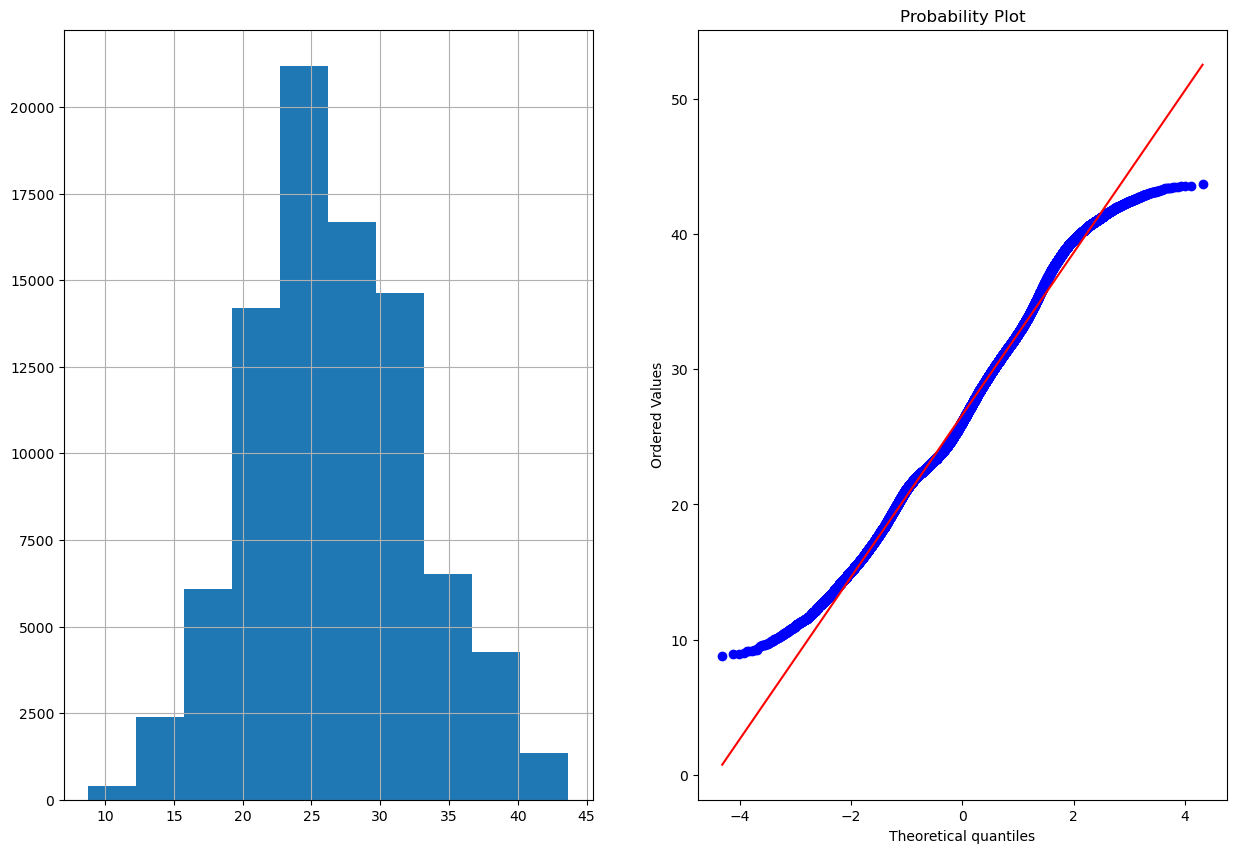

PRECTOTCORR


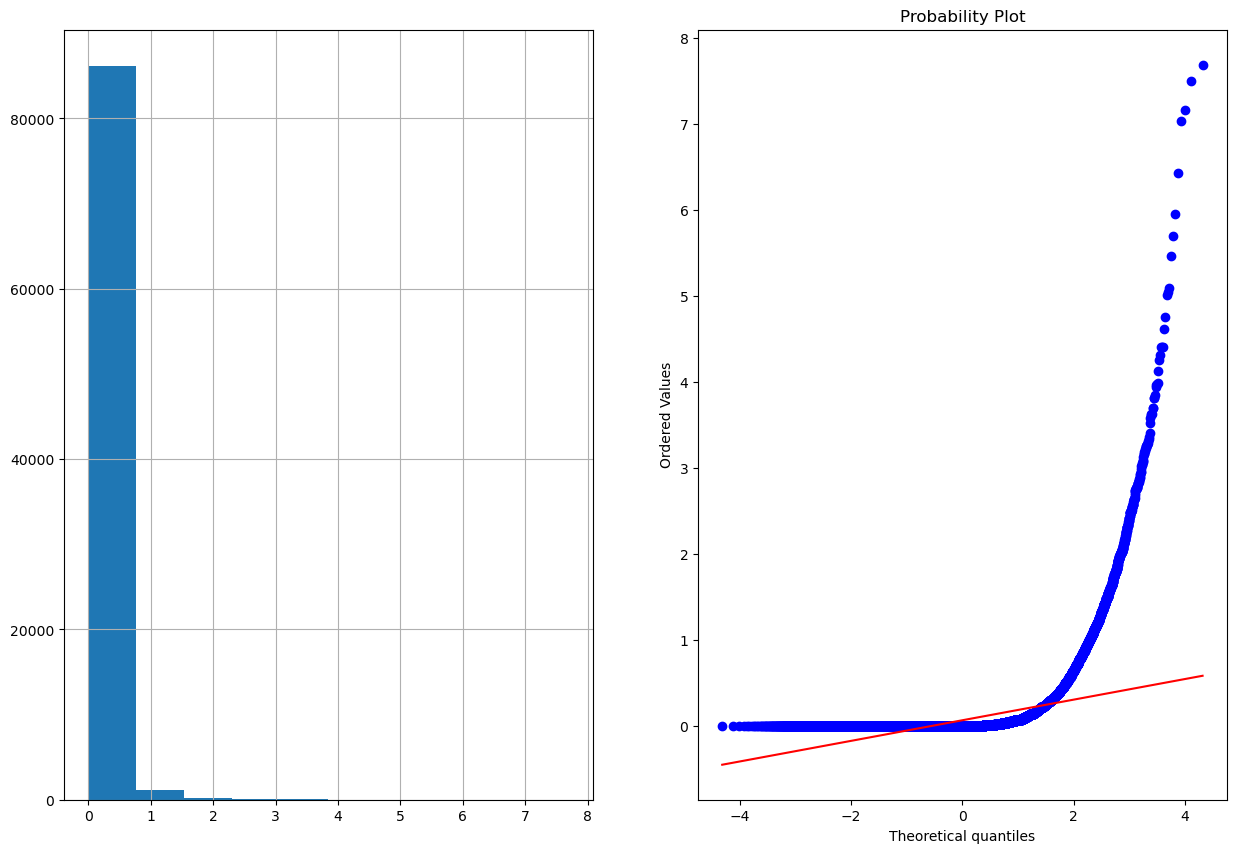

WS50M


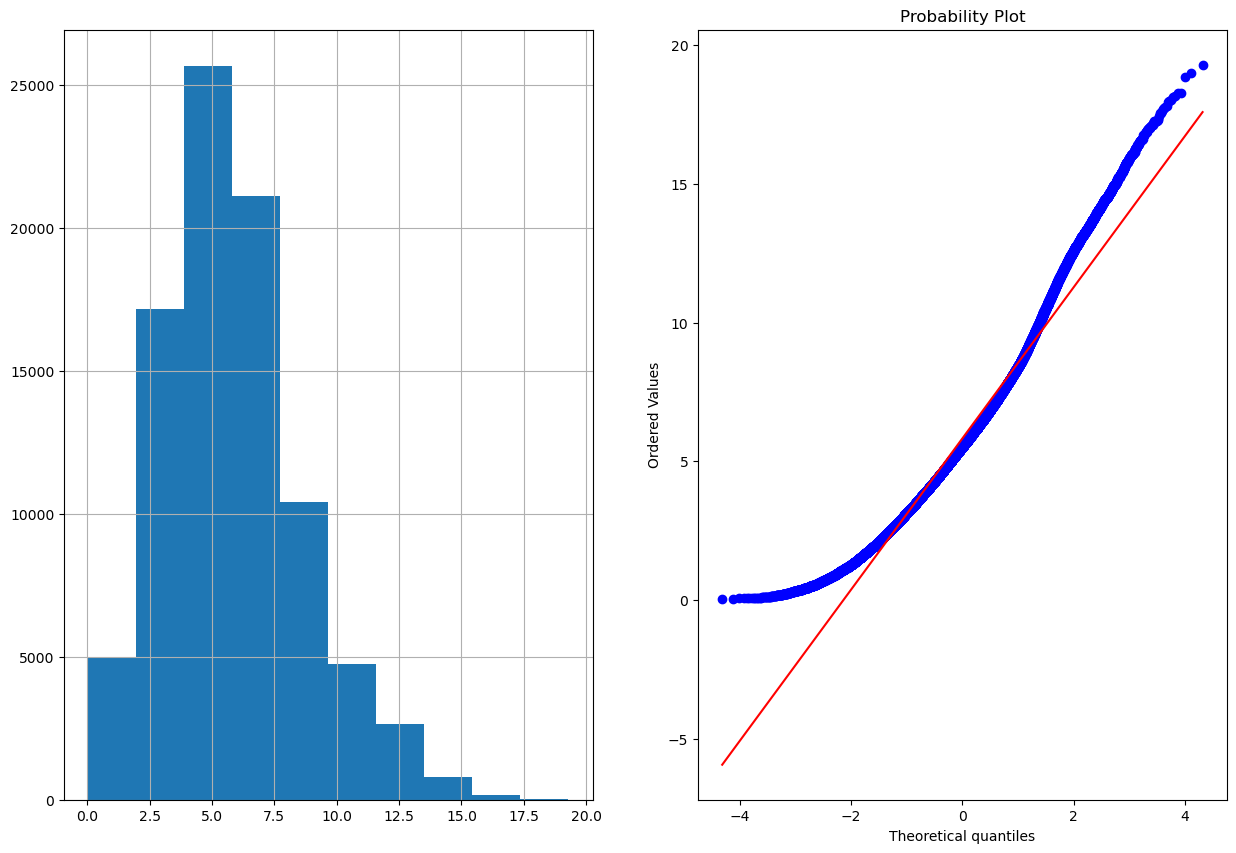

RH2M


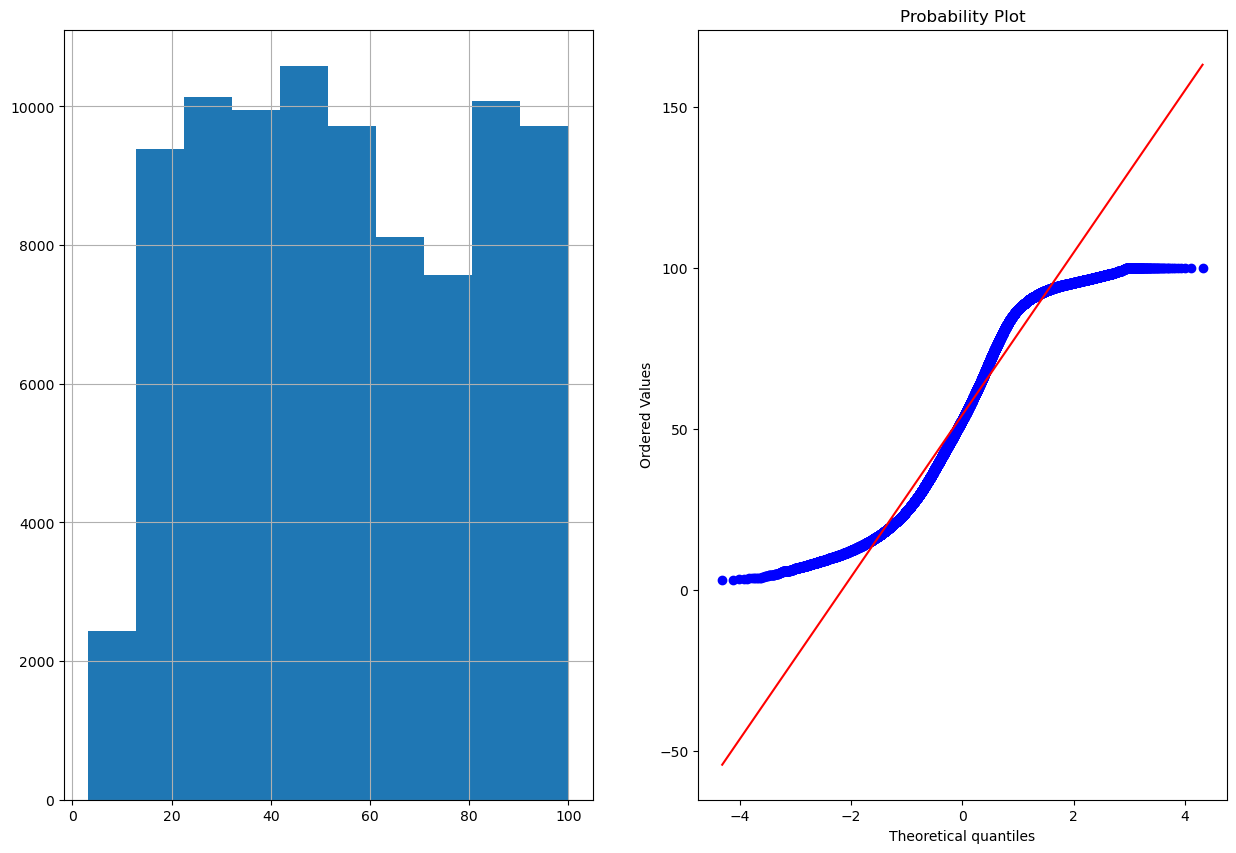

PS


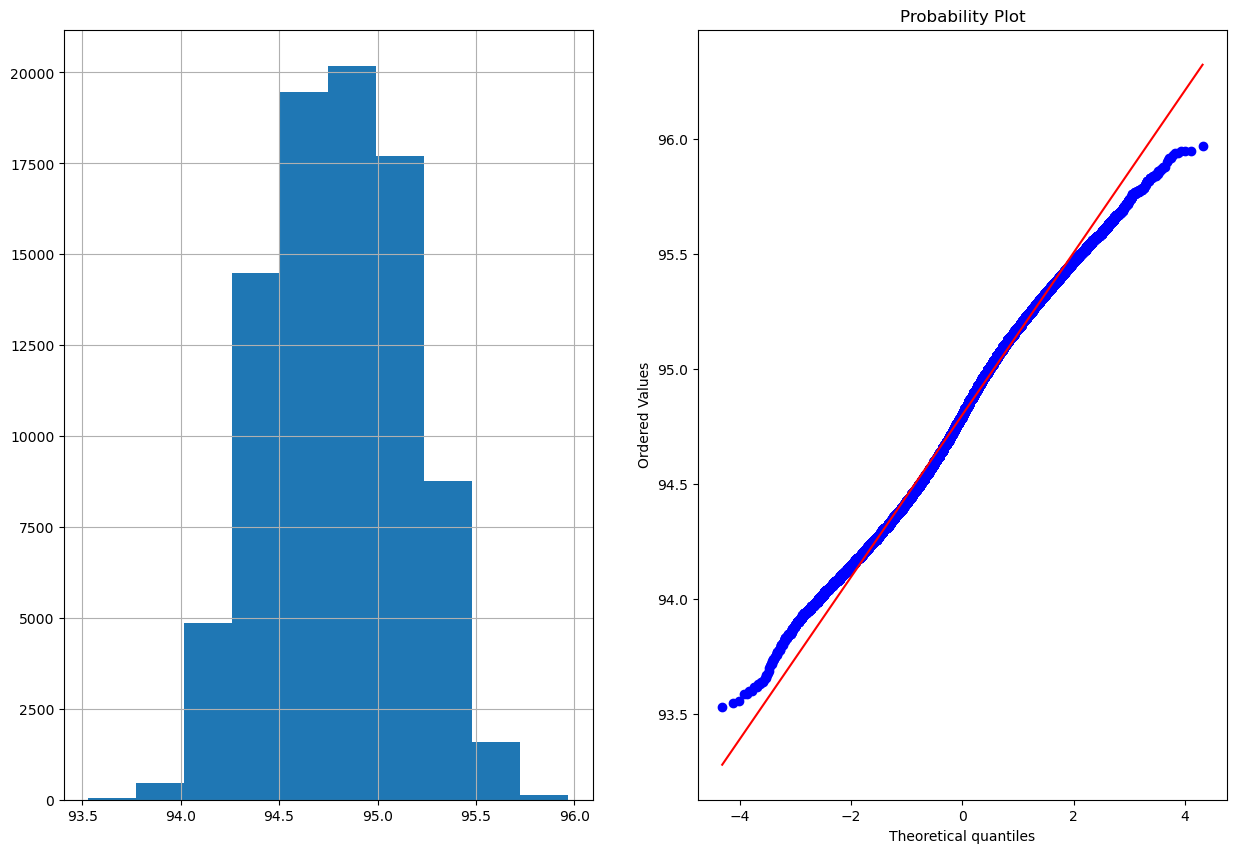

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.  , 0.04, 0.08, 0.1 , 0.15, 0.21, 0.24, 0.27, 0.3 , 0.28, 0.09,
       0.03, 0.05, 0.02, 0.07, 0.01, 0.06, 0.14, 0.18, 0.11, 0.13, 0.22,
       0.47, 0.75, 0.99, 0.7 , 0.36, 0.17, 0.25, 0.12, 0.16, 0.71, 0.77,
       0.86, 0.78, 0.51, 0.33, 0.23, 0.54, 0.45, 0.38, 0.26, 0.35, 0.42,
       0.32, 0.48, 0.53, 0.5 , 0.39, 0.2 , 0.19, 0.43, 0.57, 0.58, 0.63,
       0.66, 0.44, 0.56, 0.41, 0.29, 0.31, 0.37, 0.62, 1.05, 1.33, 1.34,
       1.  , 0.34, 0.4 , 0.74, 1.06, 0.93, 1.41, 1.67, 0.46, 1.07, 1.46,
       1.5 , 1.54, 1.21, 1.09, 0.69, 0.59, 2.04, 3.99, 4.13, 4.4 , 3.2 ,
       0.91, 0.95, 1.12, 1.03, 1.02, 1.11, 1.17, 0.94, 0.89, 2.08, 2.26,
       2.07, 1.37, 0.98, 0.55, 0.6 , 0.49, 0.84, 0.52, 0.87, 1.28, 1.3 ,
       0.96, 0.76, 2.03, 1.86, 1.01, 0.61, 1.74, 1.48, 1.16, 0.8 , 1.15,
       1.27, 0.81, 0.68, 0.72, 1.04, 0.79, 0.85, 0.97, 0.64, 1.59, 1.42,
       1.08, 1.45, 1.44, 1.55, 1.58, 1.36, 1.14, 1.32, 1.78, 2.33, 3.16,
       3.61, 2.37, 1.97, 2.  , 0.83, 2.01, 0.65, 0.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,20.90,1.0
1,22.62,1.0
2,26.16,1.0
3,31.79,1.0
4,34.59,1.0
...,...,...
87667,23.82,1.0
87668,23.00,1.0
87669,22.39,1.0
87670,21.86,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,20.90,1.0,5
1,22.62,1.0,6
2,26.16,1.0,7
3,31.79,1.0,8
4,34.59,1.0,9
...,...,...,...
87667,23.82,1.0,0
87668,23.00,1.0,1
87669,22.39,1.0,2
87670,21.86,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,20.90,1.0,5,1
1,22.62,1.0,6,1
2,26.16,1.0,7,1
3,31.79,1.0,8,1
4,34.59,1.0,9,1
...,...,...,...,...
87667,23.82,1.0,0,1
87668,23.00,1.0,1,1
87669,22.39,1.0,2,1
87670,21.86,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,20.90,1.0,5,1,4
1,22.62,1.0,6,1,4
2,26.16,1.0,7,1,4
3,31.79,1.0,8,1,4
4,34.59,1.0,9,1,4
...,...,...,...,...,...
87667,23.82,1.0,0,1,4
87668,23.00,1.0,1,1,4
87669,22.39,1.0,2,1,4
87670,21.86,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.90,1.0,5,1,4,2011
1,22.62,1.0,6,1,4,2011
2,26.16,1.0,7,1,4,2011
3,31.79,1.0,8,1,4,2011
4,34.59,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,23.82,1.0,0,1,4,2021
87668,23.00,1.0,1,1,4,2021
87669,22.39,1.0,2,1,4,2021
87670,21.86,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,20.90,1.0,5,1,4,2011
1,22.62,1.0,6,1,4,2011
2,26.16,1.0,7,1,4,2011
3,31.79,1.0,8,1,4,2011
4,34.59,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,23.82,1.0,0,1,4,2021
87668,23.00,1.0,1,1,4,2021
87669,22.39,1.0,2,1,4,2021
87670,21.86,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,20.90,1.0,5,1,4,2011,30.75
1,22.62,1.0,6,1,4,2011,27.50
2,26.16,1.0,7,1,4,2011,21.56
3,31.79,1.0,8,1,4,2011,13.25
4,34.59,1.0,9,1,4,2011,11.31
...,...,...,...,...,...,...,...
87667,23.82,1.0,0,1,4,2021,33.88
87668,23.00,1.0,1,1,4,2021,43.06
87669,22.39,1.0,2,1,4,2021,50.88
87670,21.86,1.0,3,1,4,2021,56.62


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,20.90,1.0,5,1,4,2011,30.75,5.90
1,22.62,1.0,6,1,4,2011,27.50,5.02
2,26.16,1.0,7,1,4,2011,21.56,3.93
3,31.79,1.0,8,1,4,2011,13.25,4.71
4,34.59,1.0,9,1,4,2011,11.31,3.80
...,...,...,...,...,...,...,...,...
87667,23.82,1.0,0,1,4,2021,33.88,9.64
87668,23.00,1.0,1,1,4,2021,43.06,9.37
87669,22.39,1.0,2,1,4,2021,50.88,8.84
87670,21.86,1.0,3,1,4,2021,56.62,8.09


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,20.90,1.0,5,1,4,2011,30.75,5.90,5.90
1,22.62,1.0,6,1,4,2011,27.50,5.02,5.02
2,26.16,1.0,7,1,4,2011,21.56,3.93,3.93
3,31.79,1.0,8,1,4,2011,13.25,4.71,4.71
4,34.59,1.0,9,1,4,2011,11.31,3.80,3.80
...,...,...,...,...,...,...,...,...,...
87667,23.82,1.0,0,1,4,2021,33.88,9.64,9.64
87668,23.00,1.0,1,1,4,2021,43.06,9.37,9.37
87669,22.39,1.0,2,1,4,2021,50.88,8.84,8.84
87670,21.86,1.0,3,1,4,2021,56.62,8.09,8.09


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

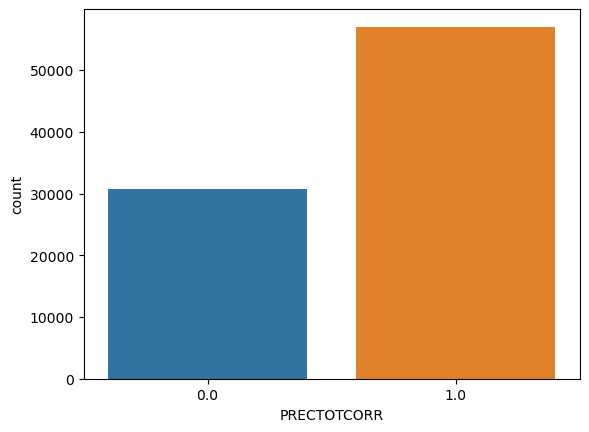

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("Vijayapura-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,20.90,1.0,5,1,4,2011,30.75,5.90,5.90
1,22.62,1.0,6,1,4,2011,27.50,5.02,5.02
2,26.16,1.0,7,1,4,2011,21.56,3.93,3.93
3,31.79,1.0,8,1,4,2011,13.25,4.71,4.71
4,34.59,1.0,9,1,4,2011,11.31,3.80,3.80
...,...,...,...,...,...,...,...,...,...
87667,23.82,1.0,0,1,4,2021,33.88,9.64,9.64
87668,23.00,1.0,1,1,4,2021,43.06,9.37,9.37
87669,22.39,1.0,2,1,4,2021,50.88,8.84,8.84
87670,21.86,1.0,3,1,4,2021,56.62,8.09,8.09
